In [254]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [184]:
cohort_input_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/compound_exploration/[M+H]+_hcd_cohort_fingerprints.bin'

In [185]:
dataset=pd.read_pickle(cohort_input_address)

In [186]:
dataset

,InChIKey,cactvs_fingerprint,metlin_adduct_or_nist,cid,inchikey,dot_product,exp_energy_parsed,fingerprint_array
0,WDUMYOXRHLWOIR-UHFFFAOYSA-N,1000000001110011000000000000000000000000000100...,nist,28058793.0,WDUMYOXRHLWOIR-UHFFFAOYSA-N,0.987620,39.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
3,IVSBFRVZTXHJLR-UHFFFAOYSA-N,1100000001110011001100000000000001000000000000...,nist,315800.0,IVSBFRVZTXHJLR-UHFFFAOYSA-N,0.855915,37.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
4,BJVLFJADOVATRU-UHFFFAOYSA-N,1100000001110000001100000000000000000000000000...,nist,747832.0,BJVLFJADOVATRU-UHFFFAOYSA-N,0.889937,38.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
5,YAUZWMLHLWHCLG-UHFFFAOYSA-N,1100000001110000001110000000000000000000000100...,nist,221498.0,YAUZWMLHLWHCLG-UHFFFAOYSA-N,0.996398,39.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
9,ZKLSFAKJJJDQSA-UHFFFAOYSA-N,1110000001110011001000000000000000000000000000...,nist,3328378.0,ZKLSFAKJJJDQSA-UHFFFAOYSA-N,0.280932,40.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
...,...,...,...,...,...,...,...,...
15951,AZVXNMOQCHVDQG-UHFFFAOYSA-N,0000000001100011000000000000000001000100000000...,nist,333028.0,AZVXNMOQCHVDQG-UHFFFAOYSA-N,1.000000,36.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
15952,RMCQCVYGHWTDSP-UHFFFAOYSA-N,1100000001110010001000000000000000000000000100...,nist,12137098.0,RMCQCVYGHWTDSP-UHFFFAOYSA-N,1.000000,42.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
15955,HUKQFKKFOGVZGH-UHFFFAOYSA-N,1000000001100010001000000000000000000110000100...,nist,11289725.0,HUKQFKKFOGVZGH-UHFFFAOYSA-N,0.997734,37.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
15957,MNDACYDFCGIUAF-UHFFFAOYSA-N,1000000001110011100000000000000001000000000000...,nist,295675.0,MNDACYDFCGIUAF-UHFFFAOYSA-N,0.586894,42.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."


In [187]:
dataset=shuffle(dataset,random_state=1337)
dataset.reset_index(inplace=True)

In [188]:
len(X[0])

881

In [189]:
X=np.array(dataset.fingerprint_array.to_list())

In [190]:
#test for other script
X[:,1]

array([1, 1, 0, ..., 1, 1, 1])

In [191]:
X

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [192]:
y=np.array(dataset.dot_product.to_list())

In [193]:
np.floor(0.8*len(X))

6638.0

In [266]:
X_train=X[0:int(np.floor(0.8*len(X)))]
y_train=y[0:int(np.floor(0.8*len(y)))]
X_test=X[int(np.floor(0.8*len(X))):]
y_test=y[int(np.floor(0.8*len(y))):]


In [195]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6638
6638
1660
1660


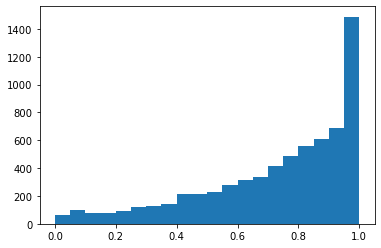

In [196]:
plt.hist(y_train,bins=20)
plt.show()

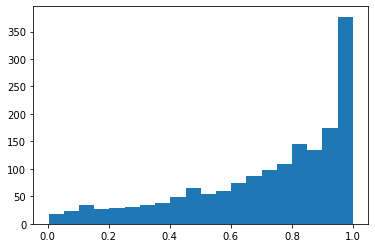

In [197]:
plt.hist(y_test,bins=20)
plt.show()

In [198]:

my_RandomForestRegressor_Pipeline=Pipeline(
    [
        #('my_StandardScaler',StandardScaler()),
        ('my_RandomForestRegressor',RandomForestRegressor())
    ]
)
my_RandomForestRegressor_parameters=[
    {
        'my_RandomForestRegressor__n_estimators':[10,20,40,100,200],
        'my_RandomForestRegressor__n_jobs':[4],
        'my_RandomForestRegressor__random_state':[1337]#,
        #'my_RandomForestRegressor__max_depth':[5]
        
    }
]

In [199]:
my_RandomForestRegressor_Gridsearch=GridSearchCV(
    my_RandomForestRegressor_Pipeline,
    my_RandomForestRegressor_parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

my_RandomForestRegressor_Gridsearch.fit(X_train,y_train)

my_RandomForestRegressor_Gridsearch_results=my_RandomForestRegressor_Gridsearch.cv_results_
for mean_score, params in zip(my_RandomForestRegressor_Gridsearch_results["mean_test_score"],my_RandomForestRegressor_Gridsearch_results["params"]):
    print(np.sqrt(-mean_score), params)
    
winner_RandomForestRegressor=my_RandomForestRegressor_Gridsearch.best_estimator_


0.21584832707430543 {'my_RandomForestRegressor__n_estimators': 10, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.21191127369105325 {'my_RandomForestRegressor__n_estimators': 20, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.2084101371391132 {'my_RandomForestRegressor__n_estimators': 40, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.2065882665103466 {'my_RandomForestRegressor__n_estimators': 100, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.20585855927307206 {'my_RandomForestRegressor__n_estimators': 200, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}


In [200]:
#define a function to visualize how good each "winning model" does
def plot_real_and_predict(temp_winning_model,temp_X_test,temp_y_test):
    '''
    Greetings
    '''
    temp_predictions=temp_winning_model.predict(temp_X_test)
    difference_array=np.subtract(np.array(temp_predictions),np.array(temp_y_test))
    #average_array=np.add(np.array(temp_predictions),np.array(temp_y_test))/2
    #percent_error_array=np.divide(100*difference_array,average_array)
    #plt.hist(percent_error_array,bins=100)
    plt.hist(difference_array,bins=100)
    plt.xlabel('dif')
    plt.ylabel('number of compounds')
    plt.show()

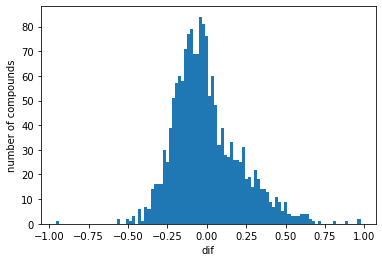

In [201]:
plot_real_and_predict(winner_RandomForestRegressor,X_test,y_test)

In [221]:
forest=winner_RandomForestRegressor['my_RandomForestRegressor']

In [222]:
importances = forest.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
plt.hist(forest_importances,bins=100)
plt.show()

In [220]:
forest_importances=forest_importances.iloc[0:50]
feature_names=forest_importances.index.to_list()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std=std[forest_importances.index]

1      0.056075
20     0.023689
374    0.014776
696    0.010691
712    0.009819
2      0.008683
186    0.008140
643    0.007763
19     0.007715
600    0.007416
528    0.007226
697    0.007209
392    0.007114
15     0.006768
dtype: float64

In [223]:
fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

1      0.056075
20     0.023689
374    0.014776
696    0.010691
712    0.009819
2      0.008683
186    0.008140
643    0.007763
19     0.007715
600    0.007416
528    0.007226
697    0.007209
392    0.007114
15     0.006768
257    0.006309
699    0.006180
364    0.006179
185    0.005786
437    0.005722
628    0.005636
391    0.005575
12     0.005551
143    0.005422
3      0.005392
335    0.005199
346    0.005149
345    0.005104
607    0.005024
688    0.004874
656    0.004859
593    0.004759
449    0.004719
192    0.004719
540    0.004570
645    0.004492
248    0.004490
672    0.004489
451    0.004456
535    0.004355
452    0.004330
440    0.004235
338    0.004001
516    0.003964
24     0.003956
665    0.003884
376    0.003883
341    0.003875
638    0.003750
685    0.003667
16     0.003647
dtype: float64

(array([ 162.,  159.,  215.,  271.,  426.,  505.,  654.,  906., 1166.,
        2174.]),
 array([7.29218596e-05, 1.00065630e-01, 2.00058337e-01, 3.00051045e-01,
        4.00043753e-01, 5.00036461e-01, 6.00029169e-01, 7.00021877e-01,
        8.00014584e-01, 9.00007292e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

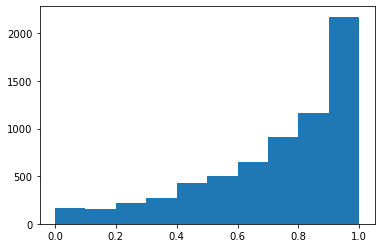

In [263]:
plt.hist(y_train)

In [288]:
X_train=X[0:int(np.floor(0.8*len(X)))]
y_train=y[0:int(np.floor(0.8*len(y)))]
X_test=X[int(np.floor(0.8*len(X))):]
y_test=y[int(np.floor(0.8*len(y))):]

In [278]:
#one approach
#y_train=np.square(y_train)

In [273]:
my_max=max(y_train[y_train<1])

In [274]:
y_train[y_train==1]=my_max

In [275]:
y_train=np.log2((1-y_train))

(array([ 574.,  437.,  438.,  495.,  515.,  571.,  668.,  686.,  746.,
        1508.]),
 array([5.31759760e-09, 9.99935528e-02, 1.99987100e-01, 2.99980648e-01,
        3.99974195e-01, 4.99967743e-01, 5.99961290e-01, 6.99954838e-01,
        7.99948386e-01, 8.99941933e-01, 9.99935481e-01]),
 <BarContainer object of 10 artists>)

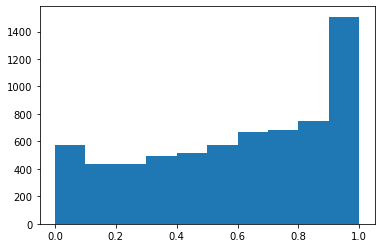

In [279]:
plt.hist(y_train)

In [289]:
my_Linear_Pipeline = Pipeline([
    ('my_StandardScaler',StandardScaler()),
    ('my_LinearRegression',LinearRegression())
])

my_Linear_Pipeline_Parameters = [
    {
        'my_LinearRegression__fit_intercept':[True,False]
    }
]


In [290]:
my_Linear_Gridsearch=GridSearchCV(
    my_Linear_Pipeline,
    my_Linear_Pipeline_Parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)
my_Linear_Gridsearch.fit(X_train,y_train)
my_Linear_Gridsearch_results=my_Linear_Gridsearch.cv_results_
for mean_score, params in zip(my_Linear_Gridsearch_results["mean_test_score"],my_Linear_Gridsearch_results["params"]):
    print(np.sqrt(-mean_score), params)
winner_LinearRegression=my_Linear_Gridsearch.best_estimator_
#plot_real_and_predict(winner_LinearRegression,X_test,y_test)

30674792251.216583 {'my_LinearRegression__fit_intercept': True}
477776370886.7652 {'my_LinearRegression__fit_intercept': False}


In [291]:
y_predict=winner_LinearRegression.predict(X_test)

In [292]:
y_pred

array([0.58033478, 0.27786218, 0.5971533 , ..., 0.51559507, 0.71241581,
       0.61570989])

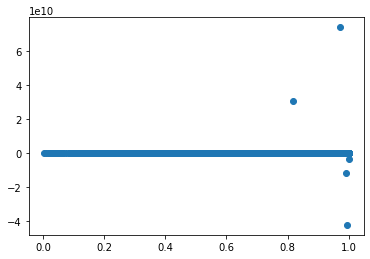

In [293]:

plt.scatter(y_test,y_predict)
plt.show()

In [294]:
y_test

array([0.7685575 , 0.10098461, 0.57853069, ..., 0.8232397 , 0.82250649,
       0.85896524])

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.656e+03, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.23151545e+10, -3.06770354e+10, -1.90389163e+10, -7.40079717e+09,
         4.23732195e+09,  1.58754411e+10,  2.75135602e+10,  3.91516793e+10,
         5.07897984e+10,  6.24279175e+10,  7.40660367e+10]),
 <BarContainer object of 10 artists>)

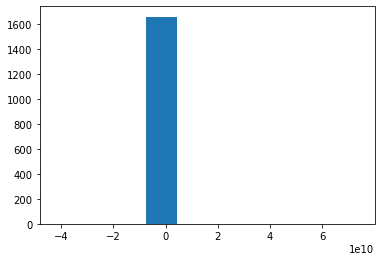

In [295]:
plt.hist(y_predict)

(array([ 41.,  62.,  58.,  72., 113., 114., 162., 207., 280., 551.]),
 array([0.00251901, 0.10226711, 0.20201521, 0.30176331, 0.40151141,
        0.50125951, 0.60100761, 0.7007557 , 0.8005038 , 0.9002519 ,
        1.        ]),
 <BarContainer object of 10 artists>)

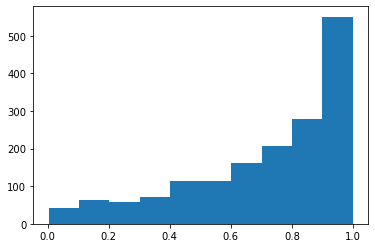

In [296]:
plt.hist(y_test)

In [297]:
max(y_predict)

74066036655.6242

In [301]:
list(y_predict).index(max(y_predict))

1558

In [302]:
X_test[1558]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,